In [35]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
data=pd.read_csv("merged_dataset1.csv")
print(data.shape)
data.head()

(40231, 93)


,BA,UTC_time,Local_date,Hour,Data_issue,Local_time,Time_zone,Generation only,DF,D,...,Speedmph,Gustmph,LeafWetu.,SolarRadW/m²,8 in. SoilTmp°F,Atm.Press.inHg,2nd AirTempAvg°F,Dir°,DTUTC,DTPST
0,SCL,2015-07-01 08:00:00,7/1/2015,1,1,7/1/2015 1:00,Pacific,N,865.0,873.0,...,5.4,13.2,0.0,515.0,79.9,29.95,88.6,W,2015-07-01 08:00:00,2015-07-01 16:00:00
1,SCL,2015-07-01 09:00:00,7/1/2015,2,1,7/1/2015 2:00,Pacific,N,841.0,833.0,...,4.8,10.7,0.0,349.0,80.4,29.95,87.3,W,2015-07-01 09:00:00,2015-07-01 17:00:00
2,SCL,2015-07-01 10:00:00,7/1/2015,3,1,7/1/2015 3:00,Pacific,N,790.0,802.0,...,5.0,11.7,0.0,189.0,80.7,29.95,84.1,W,2015-07-01 10:00:00,2015-07-01 18:00:00
3,SCL,2015-07-01 11:00:00,7/1/2015,4,1,7/1/2015 4:00,Pacific,N,783.0,796.0,...,1.3,7.8,0.0,47.0,80.8,29.95,79.5,W,2015-07-01 11:00:00,2015-07-01 19:00:00
4,SCL,2015-07-01 12:00:00,7/1/2015,5,1,7/1/2015 5:00,Pacific,N,800.0,807.0,...,1.0,4.9,0.0,2.0,80.7,29.94,74.4,W,2015-07-01 12:00:00,2015-07-01 20:00:00


In [37]:
columns=data.columns.values
columns

array(['BA', 'UTC_time', 'Local_date', 'Hour', 'Data_issue', 'Local_time',
       'Time_zone', 'Generation only', 'DF', 'D', 'NG', 'TI',
       'Missing DIBA', 'Missing NG by energy source',
       'Missing D by subregion', 'DF  Range Error', 'D   Range Error',
       'NG  Range Error', 'TI  Range Error', 'Imputed D', 'Imputed NG',
       'Imputed TI', 'AD', 'Adjusted NG', 'Adjusted TI',
       'Balance NG D TI', 'Balance TI DIBA', 'Balance NG', 'Balance D',
       'Sum (NG) over energy sources', 'NG: COL', 'NG: NG', 'NG: NUC',
       'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND', 'NG: OTH', 'NG: UNK',
       'COL   Gen Range Error', 'NG    Gen Range Error',
       'NUC   Gen Range Error', 'OIL   Gen Range Error',
       'WAT   Gen Range Error', 'SUN   Gen Range Error',
       'WND   Gen Range Error', 'OTH   Gen Range Error',
       'UNK   Gen Range Error', 'Sum (DIBA)', 'BPAT', 'PSEI',
       'Active BPAT', 'Active PSEI', 'From BPAT', 'From PSEI',
       'Balance BPAT', 'Balance PSEI', '

In [38]:
# get demand data 
# demand and forecasted demand
Y=data["D"].values
YF=data["DF"].values

# if data is bad then replace with forecasted data
# probably want to tag these locations too 

import math
for i in range(data.shape[0]):
    
    if Y[i] <=0:
        print("negative or zero load",i)
        Y[i]=YF[i]
        
    if Y[i] <=400:
        print("too low",i)
        Y[i]=(YF[i+1] + YF[i-1])/2
        
    if Y[i]  > 2500:
        print("load to big",i)
        Y[i]=YF[i]
        
    if Y[i]  is  np.nan:
        print("nan",i)
        Y[i]=YF[i]
        
    if Y[i]== " ":
        print("missing",i)
        Y[i]=YF[i]
    
    if Y[i]== "":
        print("missing",i)
        Y[i]=YF[i]
        
    if math.isnan(Y[i]):
        print("nan",i,Y[i])
        Y[i]=YF[i]

too low 12760
too low 12763
too low 12764
too low 12765
too low 12766
too low 12767
too low 12768
too low 12769
too low 12770
too low 12771
too low 12772
too low 12773
too low 12774
too low 12777
too low 12778
too low 12779
too low 12780
too low 12781
too low 12782
too low 12784
negative or zero load 12785
negative or zero load 12786
negative or zero load 12787
negative or zero load 12788
negative or zero load 12789
too low 12790
negative or zero load 12791
negative or zero load 12792
negative or zero load 12793
negative or zero load 12794
negative or zero load 12795
negative or zero load 12796
negative or zero load 12797
negative or zero load 12798
negative or zero load 12799
negative or zero load 12800
negative or zero load 12801
negative or zero load 12802
negative or zero load 12803
negative or zero load 12804
negative or zero load 12805
negative or zero load 12806
negative or zero load 12807
negative or zero load 12808
negative or zero load 12809
negative or zero load 12810
negati

In [40]:
np.min(Y)

403.0

In [41]:
# feature columns
X_columns=['Min°F', 'Avg°F', 'Max°F', 'DewPoint°F', 'RelHum%', 'TotPrecin',
       'Speedmph', 'Gustmph', 'LeafWetu.', 'SolarRadW/m²',
       '8 in. SoilTmp°F', 'Atm.Press.inHg', 
           '2nd AirTempAvg°F', 'Dir°',"DTPST"]

In [42]:
# feature data frame
XDF=data[X_columns]
XDF.head()

,Min°F,Avg°F,Max°F,DewPoint°F,RelHum%,TotPrecin,Speedmph,Gustmph,LeafWetu.,SolarRadW/m²,8 in. SoilTmp°F,Atm.Press.inHg,2nd AirTempAvg°F,Dir°,DTPST
0,88.4,89.0,89.7,57.8,35.0,0.0,5.4,13.2,0.0,515.0,79.9,29.95,88.6,W,2015-07-01 16:00:00
1,86.7,87.8,88.5,58.5,37.2,0.0,4.8,10.7,0.0,349.0,80.4,29.95,87.3,W,2015-07-01 17:00:00
2,83.7,84.6,85.9,58.2,40.7,0.0,5.0,11.7,0.0,189.0,80.7,29.95,84.1,W,2015-07-01 18:00:00
3,76.6,80.3,83.3,59.5,49.5,0.0,1.3,7.8,0.0,47.0,80.8,29.95,79.5,W,2015-07-01 19:00:00
4,72.3,75.0,77.2,59.2,58.1,0.0,1.0,4.9,0.0,2.0,80.7,29.94,74.4,W,2015-07-01 20:00:00


In [43]:
# add hours, day
dates=pd.to_datetime(XDF.DTPST.values)
hours=dates.hour
days=dates.day

XDF["hour"]=hours
XDF["day"]=days

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [44]:
XDF.head()

,Min°F,Avg°F,Max°F,DewPoint°F,RelHum%,TotPrecin,Speedmph,Gustmph,LeafWetu.,SolarRadW/m²,8 in. SoilTmp°F,Atm.Press.inHg,2nd AirTempAvg°F,Dir°,DTPST,hour,day
0,88.4,89.0,89.7,57.8,35.0,0.0,5.4,13.2,0.0,515.0,79.9,29.95,88.6,W,2015-07-01 16:00:00,16,1
1,86.7,87.8,88.5,58.5,37.2,0.0,4.8,10.7,0.0,349.0,80.4,29.95,87.3,W,2015-07-01 17:00:00,17,1
2,83.7,84.6,85.9,58.2,40.7,0.0,5.0,11.7,0.0,189.0,80.7,29.95,84.1,W,2015-07-01 18:00:00,18,1
3,76.6,80.3,83.3,59.5,49.5,0.0,1.3,7.8,0.0,47.0,80.8,29.95,79.5,W,2015-07-01 19:00:00,19,1
4,72.3,75.0,77.2,59.2,58.1,0.0,1.0,4.9,0.0,2.0,80.7,29.94,74.4,W,2015-07-01 20:00:00,20,1


In [45]:
# features for training
x_columns=['Min°F', 'Avg°F', 'Max°F', 'DewPoint°F', 'RelHum%', 'TotPrecin',
       'Speedmph', 'Gustmph', 'LeafWetu.', 'SolarRadW/m²',
       '8 in. SoilTmp°F', 'Atm.Press.inHg', 
           '2nd AirTempAvg°F', 'Dir°',"hour","day"]

In [46]:
# features in an array 
X=XDF[x_columns].values

In [47]:
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.ensemble import RandomForestRegressor as RF

In [48]:
# label encode the wind direction feature

wd_enc=LE()
wd_enc.fit(X[:,13])
X[:,13]=wd_enc.transform(X[:,13])

In [49]:
# hours in two years
train_hour=2*365*14

# hours in a week
wk_hour=24*7

In [50]:
# while loop for training


# set up regression model 
reg=RF(n_estimators=10)

N=data.shape[0]

keep_going=True

start=0; end=train_hour
count=0
while keep_going:
    
    
    #print(start, end)
    #print(count)

    end_test=end + wk_hour
    
    y_train=Y[start:end]
    x_train=X[start:end]
    
    print(y_train.size)
    
    if end_test >N:
        
        y_test=Y[end:]
        x_test=X[end:,:]
        
    else: 
        
        y_test=Y[end:end_test]
        x_test=X[end:end_test,:]
        
    reg.fit(x_train,y_train)
    
    y_p=reg.predict(x_test)
    
    if count==0:
        y_pred=y_p
        y_true=y_test
    
    else:
        y_pred=np.hstack((y_pred,y_p))
        y_true=np.hstack((y_true,y_test))
        
    start=start+wk_hour
    end=end+wk_hour
    count+=1
    
    if end > N:
        keep_going=False
    

10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
10220
1022

In [51]:
def MAPE(y_true,y_pred):
    
    val=np.absolute((y_true-y_pred)/y_true)*100
    return np.mean(val)

In [52]:
mape=MAPE(y_true,y_pred)
print("MAPE",mape)

MAPE 5.6963977486469295


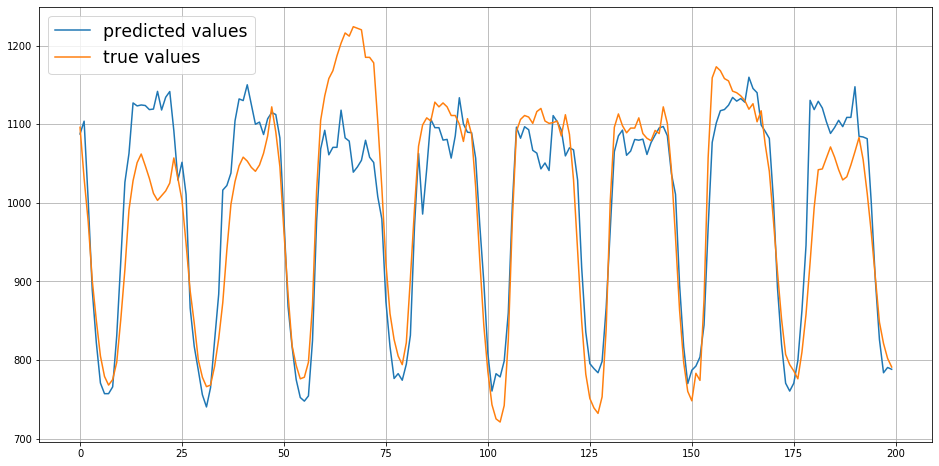

In [53]:
# sample output plot 

i1=600
i2=i1+200

fig=plt.figure(figsize=(16,8))

ax=fig.add_subplot(111)

ax.plot(y_pred[i1:i2],label="predicted values")
ax.plot(y_true[i1:i2],label="true values")
ax.grid()
ax.legend(fontsize="xx-large")

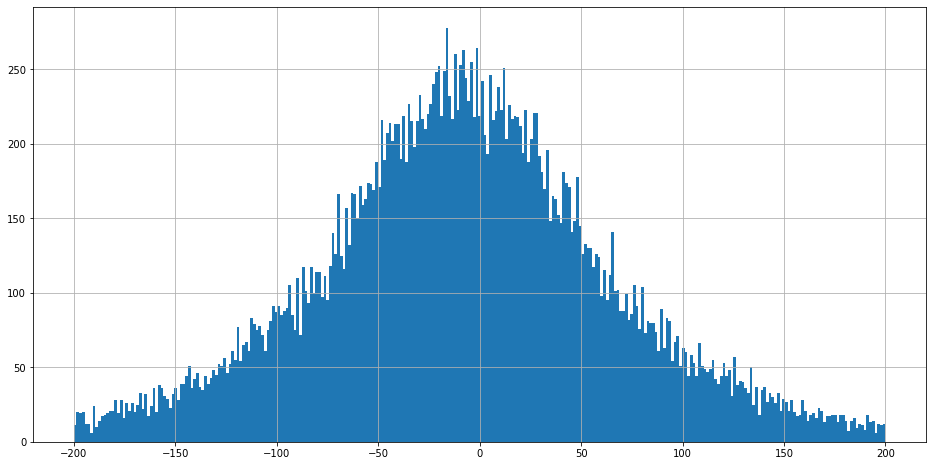

In [54]:
errors=y_true-y_pred

fig=plt.figure(figsize=(16,8))

ax=fig.add_subplot(111)

bins=np.linspace(-200,200,300)

ax.hist(errors,bins=bins)
ax.grid()

In [55]:
np.argmax(errors)

3059

In [58]:
np.max(errors)

698.2

In [59]:
np.min(errors)

-1115.0

In [61]:
idx=np.argmin(errors)
print(y_pred[idx],y_true[idx])

1645.0 530.0
